In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [2]:
from google.colab import files
uploaded=files.upload()

In [3]:
#Loading the dataset
df=pd.read_csv('sonar data.csv',header=None)

PERFORMING EDA AND DATA ANALYSIS

In [4]:
df.shape

(208, 61)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [ ]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0200,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
0.0371,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
0.0428,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
0.0207,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
0.0954,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
0.0986,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
0.1539,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
0.1601,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
0.3109,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
0.2111,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


In [ ]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [ ]:
df.eq(0).sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [ ]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
203    False
204    False
205    False
206    False
207    False
Length: 208, dtype: bool

In [ ]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

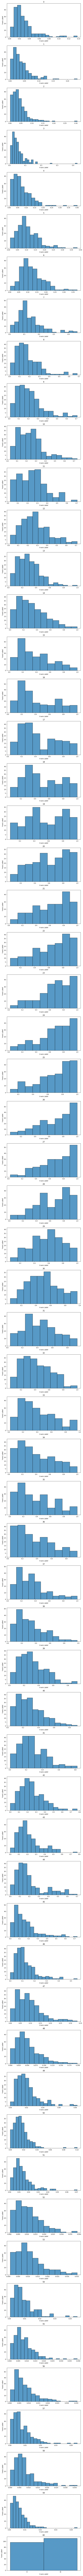

In [ ]:
#checking the distribution of the dataset visually
column_names = df.columns

# Set the number of rows and columns for subplots
num_rows = len(column_names)
num_cols = 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, num_rows*4))

# Iterate over each column
for i, column in enumerate(column_names):
    # Select the appropriate subplot
    ax = axs[i] if num_rows > 1 else axs

    # Create a histplot for the column
    sns.histplot(data=df, x=column, ax=ax)

    # Set labels and title for each subplot
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

DATA PREPROCESSING AND DATA CLEANING

LOOKING FOR OUTLIERS WITH Z SCORE METHOD

#Encoding the column no 60
1.....MINE
0.....ROCK

In [ ]:
encoder=LabelEncoder()
df[60]=encoder.fit_transform(df[60])

In [ ]:
from scipy.stats import stats
# Define a Z-score threshold (e.g., Z-score > 3 or < -3)
z_score_threshold = 3

# Function to remove outliers using Z-score
def remove_outliers_z_score(df):
    # Select only the numeric columns to calculate Z-scores
    numeric_columns = df.select_dtypes(include=[np.number])
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(numeric_columns))
    # Keep rows where all Z-scores are within the threshold
    return df[(z_scores < z_score_threshold).all(axis=1)]

# Remove outliers using Z-score
df_clean = remove_outliers_z_score(df)

# Display the dataset after removing outliers
print("Original DataFrame:")
print(df)
print("\nDataFrame after removing outliers using Z-score:")
print(df_clean)

Original DataFrame:
         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      5

<ipython-input-30-7c511715c833>:10: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  z_scores = np.abs(stats.zscore(numeric_columns))


AGAIN VISULIZING THE DATASET AFTER REMOVING OUTLIERS

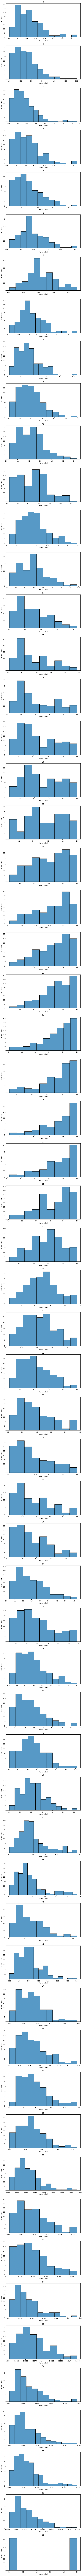

In [ ]:
#checking the distribution of the dataset visually
column_names = df_clean.columns

# Set the number of rows and columns for subplots
num_rows = len(column_names)
num_cols = 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, num_rows*4))

# Iterate over each column
for i, column in enumerate(column_names):
    # Select the appropriate subplot
    ax = axs[i] if num_rows > 1 else axs

    # Create a histplot for the column
    sns.histplot(data=df_clean, x=column, ax=ax)

    # Set labels and title for each subplot
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df_clean.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.023518,0.030290,0.035176,0.043747,0.066641,0.095901,0.110491,0.115680,0.155424,0.185860,...,0.011507,0.009385,0.009588,0.007992,0.007257,0.006888,0.006327,0.006610,0.005667,0.500000
std,0.014052,0.021525,0.025846,0.027553,0.041237,0.049633,0.047619,0.060332,0.084019,0.103403,...,0.006988,0.005942,0.006043,0.005489,0.004246,0.004610,0.004381,0.004637,0.003622,0.501495
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005700,0.011700,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013000,0.013975,0.016875,0.023500,0.035775,0.063500,0.079325,0.073275,0.094700,0.104275,...,0.006475,0.004750,0.004775,0.003800,0.004175,0.003700,0.003275,0.003275,0.003000,0.000000
50%,0.020850,0.026800,0.029100,0.039400,0.059650,0.085450,0.102350,0.107450,0.142350,0.177200,...,0.009700,0.007900,0.008450,0.006850,0.006450,0.005600,0.005150,0.005650,0.004950,0.500000
75%,0.030850,0.042025,0.047450,0.056675,0.090525,0.123050,0.140275,0.149125,0.197625,0.252950,...,0.014925,0.012725,0.013025,0.010650,0.009700,0.009275,0.008775,0.008350,0.007550,1.000000
max,0.076200,0.121000,0.152600,0.149800,0.225200,0.261100,0.230400,0.348100,0.527600,0.596500,...,0.038600,0.026500,0.027100,0.029000,0.019800,0.024200,0.024400,0.024600,0.019800,1.000000


FIRST OF ALL WE WILL FIT HERE THE LOGISTIC REGRESSION STEP WISE STEP WE WILL CHECK THE ACCURACY WITH ALL THE MODELS

LETS FIT THE MODEL
STEP 1 DEFINING THE X AND Y VARIABLE
STEP 2 WE WILL SCALE OUR DATA

In [ ]:
x=df_clean.drop(60,axis=1)
y=df_clean[60]

splitting the data into train and test

In [ ]:
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.20,random_state=42)

In [ ]:
# Initialize the StandardScaler (or MinMaxScaler if preferred)
scaler =  MinMaxScaler()

# Fit the scaler on the training data and transform it
x_train=scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test=scaler.transform(x_test)

In [ ]:
x_train.shape

(135, 60)

In [ ]:
x_test.shape

(33, 60)

In [ ]:
y_test.shape

(33,)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
yptr=model.predict(x_train)
ypts=model.predict(x_test)

checking the accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
print('The Accuracy score for training data is',accuracy_score(y_train,yptr))
print('The Accuracy score for testing data is',accuracy_score(y_test,ypts))

The Accuracy score for training data is 0.8888888888888888
The Accuracy score for testing data is 0.696969696969697


In [ ]:
print('The score for training data is',f1_score(y_train,yptr))
print('The score for testing data is',f1_score(y_test,ypts))

The score for training data is 0.8936170212765958
The score for testing data is 0.6153846153846153


ABOVE MODEL IS OVER FIT HAVING HIGH TRAINING ACCURACY AND LOW TESTING ACCURACY APPLYING PCA HERE AND REDUCED THE DIMENSIONALITY

In [ ]:
# Apply PCA to the scaled data
from sklearn.decomposition import PCA
pca=PCA(n_components=2)# Specify the number of components you want to retain
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [ ]:
model2=LogisticRegression()

In [ ]:
model2.fit(x_train_pca,y_train)

LogisticRegression()

In [ ]:
yptr2=model.predict(x_train_pca)
ypts2=model.predict(x_test_pca)

In [ ]:
print('The Accuracy score for training data is',accuracy_score(y_train,yptr2))
print('The Accuracy score for testing data is',accuracy_score(y_test,ypts2))

The Accuracy score for training data is 1.0
The Accuracy score for testing data is 0.7575757575757576


In [ ]:
print('The score for training data is',f1_score(y_train,yptr2))
print('The score for testing data is',f1_score(y_test,ypts2))

The score for training data is 1.0
The score for testing data is 0.7142857142857143


TRYING WITH DECISION TREE-IN CROSS VALIDATION WAY

In [ ]:
model3=DecisionTreeClassifier()
# Perform 5-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(model3, x, y, cv=5, scoring='f1_weighted')

# Print the accuracy scores for each fold
print("Cross-validation accuracy scores:", cv_scores)

# Calculate the average accuracy score over all folds
avg_accuracy = np.mean(cv_scores)
print("Average accuracy:", avg_accuracy)

NameError: ignored

TRYING WITH DECISION TREE-GRID SEARCH CV WAY

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,range(1,20)],
    'min_samples_split': range(1,20),
    'min_samples_leaf': range(1,20)}
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning using Grid Search
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the corresponding best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict the target values for the testing set using the best model
ypts3 = best_model.predict(x_test)
yptr3 = best_model.predict(x_train)

# Calculate the accuracy score for the testing set
testing_accuracy = accuracy_score(y_test, ypts3)
training_accuracy = accuracy_score(y_train, yptr3)

# Print the best hyperparameters and the accuracy score for the testing set
print("Best Hyperparameters:", best_params)
print("Testing Accuracy:", testing_accuracy)
print("Training Accuracy:", training_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 12}
Testing Accuracy: 0.6666666666666666
Training Accuracy: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3800 fits failed out of a total of 7220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

Lets play with uncleaned data because we tried many algorithm but same problem of overfitting

In [ ]:
x2=df.drop(60,axis=1)
y2=df[60]

In [ ]:
x_test2,x_train2,y_test2,y_train2=train_test_split(x2,y2,train_size=0.20,random_state=42)
# Initialize the StandardScaler (or MinMaxScaler if preferred)
scaler =  MinMaxScaler()

# Fit the scaler on the training data and transform it
x_train2=scaler.fit_transform(x_train2)

# Transform the test data using the same scaler
x_test2=scaler.transform(x_test2)


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,range(1,20)],
    'min_samples_split': range(1,20),
    'min_samples_leaf': range(1,20)}
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning using Grid Search
grid_search.fit(x_train2, y_train2)

# Get the best hyperparameters and the corresponding best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict the target values for the testing set using the best model
ypts4= best_model.predict(x_test2)
yptr4 = best_model.predict(x_train2)

# Calculate the accuracy score for the testing set
testing_accuracy = accuracy_score(y_test2, ypts4)
training_accuracy = accuracy_score(y_train2, yptr4)

# Print the best hyperparameters and the accuracy score for the testing set
print("Best Hyperparameters:", best_params)
print("Testing Accuracy:", testing_accuracy)
print("Training Accuracy:", training_accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 19}
Testing Accuracy: 0.8536585365853658
Training Accuracy: 0.9341317365269461


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3800 fits failed out of a total of 7220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

HENCE PROBLEM WAS IN OUR CLEAN DATA WE NEED NOT TO REMOVE OUTLIERS BECAUSE OF REMOVING OUTLIERS OUR SIZE OF DATA GOT REDUCED AND MODEL GOT OVERFIT LETS CHECK WITH RANDOM SEARCH CV ALSO

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),  # Range from None to 20
    'min_samples_split': randint(2, 21),  # Random integer from 2 to 20
    'min_samples_leaf': randint(1, 21)  # Random integer from 1 to 20
}

# Initialize the DecisionTreeClassifier
model3 = DecisionTreeClassifier()

# Initialize RandomizedSearchCV with the model, param_dist, and other parameters
random_search = RandomizedSearchCV(model3, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search.fit(x_train2, y_train2)

# Get the best hyperparameters and the corresponding best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predict the target values for the testing set using the best model
ypts4 = best_model.predict(x_test2)
yptr4 = best_model.predict(x_train2)

# Calculate the accuracy score for the testing set
testing_accuracy = accuracy_score(y_test2, ypts4)
training_accuracy = accuracy_score(y_train2, yptr4)

# Print the best hyperparameters and the accuracy score for the testing set
print("Best Hyperparameters:", best_params)
print("Testing Accuracy:", testing_accuracy)
print("Training Accuracy:", training_accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 8, 'min_samples_split': 5}
Testing Accuracy: 0.8780487804878049
Training Accuracy: 0.9281437125748503


TRYING WITH RANDOM FOREST CLASSIFIER AND BAGGING CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
model5 = RandomForestClassifier(n_estimators=100, max_features=4,random_state=42)
kfold=KFold(n_splits=10)
results=cross_val_score(model5, x2, y2,cv=kfold)
print(results)
print(results.mean())

[0.33333333 0.71428571 0.57142857 0.61904762 0.52380952 0.42857143
 0.66666667 0.57142857 0.55       0.7       ]
0.5678571428571428


In [ ]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_features': [2, 3, 4, 'auto'],  # Maximum number of features to consider at each split
    'max_depth': [None, 10, 20],  # Maximum depth of the tree. None means nodes are expanded until all leaves are pure.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestClassifier
model5 = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the model, param_grid, and other parameters
grid_search = GridSearchCV(model5, param_grid, cv=KFold(n_splits=10, random_state=None), scoring='accuracy')

# Perform hyperparameter tuning using GridSearchCV
grid_search.fit(x2, y2)

# Get the best hyperparameters and the corresponding best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Get the cross-validation results
results = grid_search.cv_results_['mean_test_score']

# Print the cross-validation results and the best hyperparameters
print("Cross-validation results:")
print(results)
print("Best Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-validation results:
[0.57285714 0.53452381 0.54404762 0.5152381  0.50095238 0.5247619
 0.525      0.51571429 0.5197619  0.52       0.515      0.53428571
 0.525      0.5152381  0.52928571 0.5247619  0.525      0.515
 0.525      0.5102381  0.52       0.525      0.5102381  0.52
 0.5347619  0.53452381 0.5197619  0.56357143 0.54404762 0.54857143
 0.56238095 0.56761905 0.54857143 0.515      0.53928571 0.55333333
 0.52904762 0.5147619  0.515      0.53857143 0.53904762 0.53880952
 0.53857143 0.52928571 0.54857143 0.54833333 0.55809524 0.56261905
 0.54833333 0.55809524 0.56261905 0.53380952 0.53880952 0.54833333
 0.58214286 0.56785714 0.56309524 0.59214286 0.57285714 0.58238095
 0.53857143 0.54333333 0.54357143 0.57690476 0.55309524 0.55809524
 0.57214286 0.57214286 0.56738095 0.54333333 0.56238095 0.57214286
 0.56238095 0.55285714 0.56714286 0.56238095 0.55285714 0.56714286
 0.55285714 0.54809524 0.56238095 0.55880952 0.57785714 0.57309524
 0.59261905 0.56380952 0.57785714 0.53857143 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print(results.mean())

0.5501205173427396
